In [19]:
import numpy as np
import pandas as pd
import os
from yellowbrick.features import RadViz, PCADecomposition, Manifold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from yellowbrick.target import ClassBalance
from sklearn.decomposition import IncrementalPCA, TruncatedSVD
from scipy.sparse import csr_matrix
import joblib

In [2]:
# import data

DATA_PATH = "../new_data/Train/"

image_data = pd.read_csv(os.path.join(DATA_PATH, "Image", "oxford.csv"))
text_data_liwc = pd.read_csv(os.path.join(DATA_PATH, "Text", "liwc.csv"))
text_data_nrc = pd.read_csv(os.path.join(DATA_PATH, "Text", "nrc.csv"))
relational_data = pd.read_csv(os.path.join(DATA_PATH, "Relation", "Relation.csv"))

profiles = pd.read_csv(os.path.join(DATA_PATH, "Profile", "Profile.csv"))

In [23]:
def plot_manifolds(features, targets, num_samples=100, type='tsne', out=None):

    fig, axes = plt.subplots(4,2, figsize=(20,20))

    for col in range(targets.shape[1]):
        ix = (col+1)//2
        c = (col+1) % 2
        
        if type == 'tsne':
            manifold = Manifold(ax=axes[ix, c], manifold='tsne')
        elif type == 'pca':
            manifold = PCADecomposition(ax=axes[ix, c])
        axes[ix,c].set_title(y_columns[col])
        if col == 1:
            y = LabelEncoder().fit_transform(targets[:, 1])
        else:
            y = targets[:, col]
        manifold.fit_transform(features[:num_samples], y[:num_samples])
    
    manifold.show(outpath=out)  

Take a peak at the different data tables...

### Images

In [4]:
image_data.head()

,userId,faceID,faceRectangle_width,faceRectangle_height,faceRectangle_left,faceRectangle_top,pupilLeft_x,pupilLeft_y,pupilRight_x,pupilRight_y,...,underLipTop_x,underLipTop_y,underLipBottom_x,underLipBottom_y,facialHair_mustache,facialHair_beard,facialHair_sideburns,headPose_roll,headPose_yaw,headPose_pitch
0,0000e06e07496624211632e8e264126c,f7e072db-8532-4686-9074-27e83fee5e94,61,61,15,49,32.7,64.7,59.7,65.0,...,41.8,94.3,41.9,98.6,0.0,0.0,0.0,3.9,-22.4,0.0
1,000235a2ba2f48231b7d24e1f08d7878,934b5179-acec-4dea-a348-feae87767c2d,83,83,91,95,114.4,117.6,154.5,121.0,...,130.5,164.5,130.1,169.6,0.1,0.0,0.0,5.2,-8.3,0.0
2,000235a2ba2f48231b7d24e1f08d7878,118c1f96-b32a-4021-a993-8f60e9859517,76,76,22,50,49.6,64.1,79.6,78.7,...,52.4,114.6,51.2,118.5,0.5,0.4,0.2,22.7,27.1,0.0
3,000c4b6e2468f7d528876fd1a6dffd4c,1eb367c8-9467-411f-9689-fd1affa95654,121,121,10,21,45.8,55.4,97.5,49.9,...,67.3,111.4,67.8,119.3,0.3,0.3,0.3,-1.3,-11.7,0.0
4,001494c3b74f124a2e3435fff17f376b,384ff8c2-efd3-4d34-a9c1-e0756fc0312c,115,115,0,29,41.1,55.6,91.1,72.9,...,46.6,116.6,45.9,120.1,0.0,0.0,0.0,19.3,1.1,0.0


In [5]:
image_data.describe()

,faceRectangle_width,faceRectangle_height,faceRectangle_left,faceRectangle_top,pupilLeft_x,pupilLeft_y,pupilRight_x,pupilRight_y,noseTip_x,noseTip_y,...,underLipTop_x,underLipTop_y,underLipBottom_x,underLipBottom_y,facialHair_mustache,facialHair_beard,facialHair_sideburns,headPose_roll,headPose_yaw,headPose_pitch
count,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,...,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.000000,7915.0
mean,78.358307,78.532533,59.513708,53.225395,81.355565,74.873165,115.756740,74.694428,98.746684,95.969438,...,98.860657,114.965521,98.906494,119.577599,0.094100,0.107732,0.080884,-0.412685,-0.536096,0.0
std,27.807494,27.907494,28.768650,24.880086,26.449518,26.044935,26.508456,25.993112,26.157600,29.331723,...,26.104096,32.710479,26.258165,33.811626,0.183125,0.192777,0.160685,10.042691,17.636586,0.0
min,36.000000,36.000000,0.000000,0.000000,1.000000,7.500000,23.900000,6.300000,8.800000,20.800000,...,10.600000,33.400000,8.700000,36.000000,0.000000,0.000000,0.000000,-50.900000,-53.100000,0.0
25%,56.000000,56.000000,40.000000,37.000000,65.500000,56.600000,100.450000,56.500000,83.000000,74.700000,...,84.200000,91.200000,84.300000,95.050000,0.000000,0.000000,0.000000,-5.600000,-11.900000,0.0
50%,76.000000,76.000000,59.000000,51.000000,80.700000,73.300000,116.700000,73.000000,99.100000,94.300000,...,99.100000,113.600000,99.200000,118.300000,0.000000,0.000000,0.000000,-0.400000,-0.400000,0.0
75%,95.000000,96.000000,78.000000,67.000000,95.800000,90.200000,131.600000,90.300000,114.000000,115.000000,...,113.200000,136.950000,113.400000,142.000000,0.100000,0.200000,0.100000,4.700000,10.450000,0.0
max,199.000000,217.000000,163.000000,229.000000,173.800000,239.200000,196.000000,240.500000,183.900000,286.600000,...,187.800000,315.300000,189.000000,328.700000,1.000000,1.000000,1.000000,42.700000,52.000000,0.0


### Text LIWC 

In [6]:
text_data_liwc.columns = text_data_liwc.columns.str.lower()
text_data_liwc.wc = text_data_liwc.wc.astype(np.float64)
text_data_liwc.head()

,userid,wc,wps,sixltr,dic,numerals,funct,pronoun,ppron,i,...,colon,semic,qmark,exclam,dash,quote,apostro,parenth,otherp,allpct
0,1c1bb692d7765344d418c0247962e7f8,156.0,17.33,25.00,76.92,1.92,45.51,9.62,6.41,3.21,...,1.92,0.00,5.77,5.77,2.56,0.00,2.56,0.64,5.13,70.51
1,2eba17f4ec950f23af8d31a1d1db4518,176.0,11.00,21.02,84.66,0.00,53.41,15.34,12.50,7.39,...,0.57,0.00,0.00,13.07,0.00,0.00,2.27,0.28,1.14,39.77
2,4f3fc35de4f026bbe96d6aead80a011c,179.0,17.90,17.88,90.50,0.00,54.19,11.73,7.82,6.15,...,0.00,0.56,0.56,1.68,1.12,0.00,5.59,0.28,0.00,41.90
3,5b670721d060e5063273aefefd0e0731,179.0,179.00,20.67,77.09,0.00,51.40,12.29,9.50,4.47,...,0.00,0.00,1.68,0.00,1.12,0.00,2.23,0.00,0.00,34.64
4,5ca01e48cdf661e932cfe58588360a7f,18.0,18.00,44.44,55.56,0.00,27.78,0.00,0.00,0.00,...,22.22,0.00,3661.11,0.00,0.00,11.11,0.00,5.56,16.67,4111.11


In [7]:
text_data_liwc.describe()

,wc,wps,sixltr,dic,numerals,funct,pronoun,ppron,i,we,...,colon,semic,qmark,exclam,dash,quote,apostro,parenth,otherp,allpct
count,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,...,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,160.926842,34.263235,20.806617,72.641544,1.088911,43.415767,11.287999,7.542460,4.406422,0.470023,...,2.074617,0.215521,39.077479,10.428520,1.726481,0.254334,2.309436,1.098604,4.792700,95.486573
std,35.686768,40.226694,6.469357,18.416664,2.290887,12.706705,4.976198,3.783212,2.972538,0.886095,...,6.906404,0.748377,1165.012377,38.235289,10.614736,3.611128,2.108905,6.360611,34.458909,1328.871900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,13.000000,16.760000,70.590000,0.000000,39.832500,8.230000,5.030000,2.220000,0.000000,...,0.000000,0.000000,0.000000,1.640000,0.000000,0.000000,0.620000,0.000000,0.550000,32.925000
50%,170.000000,20.000000,20.240000,78.530000,0.590000,46.580000,11.360000,7.390000,4.095000,0.000000,...,0.825000,0.000000,0.650000,4.970000,0.590000,0.000000,1.850000,0.560000,1.830000,45.340000
75%,180.000000,34.400000,24.070000,83.432500,1.360000,51.400000,14.460000,9.940000,6.250000,0.610000,...,2.480000,0.000000,2.130000,11.630000,2.040000,0.000000,3.410000,1.290000,4.582500,63.957500
max,240.000000,228.000000,100.000000,100.000000,100.000000,100.000000,50.000000,40.000000,40.000000,22.220000,...,400.000000,33.330000,73600.000000,3200.000000,800.000000,312.500000,27.270000,550.000000,1600.000000,85100.000000


### Text NRC

In [8]:
text_data_nrc.columns = text_data_nrc.columns.str.lower()
text_data_nrc

,userid,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,0000e06e07496624211632e8e264126c,0.578947,0.421053,0.107143,0.107143,0.071429,0.214286,0.142857,0.178571,0.035714,0.142857
1,000235a2ba2f48231b7d24e1f08d7878,0.450000,0.550000,0.156250,0.125000,0.125000,0.093750,0.187500,0.093750,0.000000,0.218750
2,000c4b6e2468f7d528876fd1a6dffd4c,0.617647,0.382353,0.127273,0.163636,0.090909,0.127273,0.163636,0.090909,0.036364,0.200000
3,001187432d2a247562082cd0000dec40,0.730769,0.269231,0.084746,0.186441,0.033898,0.084746,0.254237,0.101695,0.101695,0.152542
4,001494c3b74f124a2e3435fff17f376b,0.875000,0.125000,0.019231,0.134615,0.019231,0.019231,0.384615,0.019231,0.057692,0.346154
...,...,...,...,...,...,...,...,...,...,...,...
9495,ffb0a8b51dd1d644bcf3d85f42dcd7d7,0.666667,0.333333,0.057692,0.115385,0.096154,0.096154,0.250000,0.076923,0.038462,0.269231
9496,ffb2830257138d30925a345f7c404d16,0.285714,0.714286,0.000000,0.000000,0.125000,0.375000,0.000000,0.250000,0.125000,0.125000
9497,ffd1a5148d201815453c698214c627c0,0.565217,0.434783,0.200000,0.050000,0.075000,0.150000,0.125000,0.125000,0.100000,0.175000
9498,ffef7e6438bb62236d1ab8e578744951,0.516129,0.483871,0.173077,0.057692,0.076923,0.173077,0.115385,0.192308,0.057692,0.153846


In [9]:
text_data_nrc.describe()

,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
count,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,0.625494,0.364401,0.090930,0.146985,0.063552,0.106231,0.191743,0.127694,0.073427,0.184384
std,0.170775,0.162867,0.067292,0.077410,0.063082,0.067343,0.092214,0.073734,0.049430,0.087175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.531250,0.260870,0.050000,0.100000,0.026316,0.063830,0.138889,0.083333,0.040816,0.135593
50%,0.636364,0.363636,0.085714,0.142857,0.055556,0.102564,0.188679,0.125000,0.071429,0.181818
75%,0.733333,0.461538,0.122807,0.190476,0.088889,0.142857,0.241379,0.166667,0.102041,0.230769
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000


### Relational

In [10]:
relational_data.head()

,Unnamed: 0,userid,like_id
0,0,c6a9a43058c8cc8398ca6e97324c0fae,8628204013
1,1,c6a9a43058c8cc8398ca6e97324c0fae,19040608370
2,2,c6a9a43058c8cc8398ca6e97324c0fae,24054583527
3,3,c6a9a43058c8cc8398ca6e97324c0fae,26726417043
4,4,c6a9a43058c8cc8398ca6e97324c0fae,31796936730


In [11]:
relational_data.describe()

,Unnamed: 0,like_id
count,1.671353e+06,1.671353e+06
mean,8.356760e+05,8.924935e+13
std,4.824782e+05,6.972030e+14
min,0.000000e+00,2.215974e+09
25%,4.178380e+05,9.010972e+10
50%,8.356760e+05,2.672632e+11
75%,1.253514e+06,1.081821e+14
max,1.671352e+06,1.015032e+16


### Targets / Profile

In [12]:
profiles

,Unnamed: 0,userid,age,gender,ope,con,ext,agr,neu
0,0,7267f43c71fcf53f4580fd3cd808bd48,26.0,0.0,4.00,2.25,2.20,3.60,2.80
1,1,e1cdac10d136e76e064e4860007d786d,24.0,0.0,4.20,3.35,2.45,3.90,2.60
2,2,ea4b8b534a35f59713f61f29b8725d09,27.0,1.0,2.75,4.80,3.15,3.85,4.15
3,3,c7bb07b4b9ccd28cd0bc285194da5c72,29.0,1.0,3.40,3.20,2.10,3.70,2.35
4,4,e8b8f7f4f40ea6babfa9a2a967ff1866,25.0,0.0,4.40,3.25,4.00,2.89,2.35
...,...,...,...,...,...,...,...,...,...
9495,9495,094f6c8f50a4783c2ad0ab18182d9e93,22.0,0.0,2.70,2.50,1.75,3.15,4.05
9496,9496,027081c27fe42c0ea3dac23604bcda8f,14.0,1.0,3.85,1.65,2.50,3.15,4.45
9497,9497,c6065e52c61187ed0db62ccee2654c6b,22.0,0.0,3.85,3.35,1.80,3.60,2.55
9498,9498,01c02aada76eec7f7d7939eab1b91671,21.0,1.0,3.60,3.40,3.15,3.90,2.80


In [13]:
profiles.describe()

,Unnamed: 0,age,gender,ope,con,ext,agr,neu
count,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,4749.500000,26.426421,0.577158,3.908691,3.445617,3.486858,3.583904,2.732424
std,2742.558112,10.377715,0.494037,0.631664,0.719547,0.809169,0.661463,0.793245
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2374.750000,20.000000,0.000000,3.500000,3.000000,3.000000,3.200000,2.160000
50%,4749.500000,23.000000,1.000000,4.000000,3.500000,3.500000,3.650000,2.750000
75%,7124.250000,29.000000,1.000000,4.350000,4.000000,4.050000,4.000000,3.250000
max,9499.000000,112.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Visualize data sources

## Image data

In [14]:
image_data.columns = image_data.columns.str.lower()
profiles.columns = profiles.columns.str.lower()
raw_image_data = np.array(image_data.drop(columns=['userid', 'faceid']))
X_columns = image_data.columns.drop(['userid', 'faceid'])
y_columns = profiles.columns.drop(['unnamed: 0', 'userid'])

In [15]:
combined_image = pd.merge(left=image_data, right=profiles, on='userid').drop(columns=['unnamed: 0'])
combined_image

,userid,faceid,facerectangle_width,facerectangle_height,facerectangle_left,facerectangle_top,pupilleft_x,pupilleft_y,pupilright_x,pupilright_y,...,headpose_roll,headpose_yaw,headpose_pitch,age,gender,ope,con,ext,agr,neu
0,0000e06e07496624211632e8e264126c,f7e072db-8532-4686-9074-27e83fee5e94,61,61,15,49,32.7,64.7,59.7,65.0,...,3.9,-22.4,0.0,30.0,1.0,4.00,4.75,4.50,2.50,3.75
1,000235a2ba2f48231b7d24e1f08d7878,934b5179-acec-4dea-a348-feae87767c2d,83,83,91,95,114.4,117.6,154.5,121.0,...,5.2,-8.3,0.0,26.0,0.0,3.80,3.30,3.80,3.70,1.80
2,000235a2ba2f48231b7d24e1f08d7878,118c1f96-b32a-4021-a993-8f60e9859517,76,76,22,50,49.6,64.1,79.6,78.7,...,22.7,27.1,0.0,26.0,0.0,3.80,3.30,3.80,3.70,1.80
3,000c4b6e2468f7d528876fd1a6dffd4c,1eb367c8-9467-411f-9689-fd1affa95654,121,121,10,21,45.8,55.4,97.5,49.9,...,-1.3,-11.7,0.0,27.0,0.0,4.10,2.85,2.15,3.20,3.65
4,001494c3b74f124a2e3435fff17f376b,384ff8c2-efd3-4d34-a9c1-e0756fc0312c,115,115,0,29,41.1,55.6,91.1,72.9,...,19.3,1.1,0.0,25.0,1.0,4.50,4.25,4.00,4.50,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7910,ffabf17623fc308c4b3329e8944e7a6c,60ded1fa-6cac-4002-87f2-e4dc92fd6585,86,86,38,84,70.1,102.8,103.4,106.7,...,8.9,-37.2,0.0,46.0,1.0,4.75,3.00,4.25,4.50,2.50
7911,ffafdf80774c97cbc90e3d80e8794e57,72fe02ae-60c1-42fc-bef1-41ce23c8ce6b,55,55,81,15,95.8,28.8,120.4,29.4,...,-0.4,7.2,0.0,29.0,0.0,3.50,4.75,4.25,3.75,2.00
7912,ffb0a8b51dd1d644bcf3d85f42dcd7d7,e4c4d0ab-80b4-4c1e-8e11-f70cae1a67b3,157,138,26,61,74.7,98.6,137.7,104.7,...,5.3,-3.3,0.0,19.0,0.0,3.65,3.26,3.65,3.65,2.95
7913,ffb2830257138d30925a345f7c404d16,51a364d0-ca61-404f-914b-8f06299c6987,37,37,94,62,106.4,70.8,122.6,73.1,...,8.6,-27.0,0.0,30.0,0.0,3.20,3.80,3.65,4.15,2.40


In [16]:
X_img = StandardScaler().fit_transform(np.array(combined_image[X_columns]))
y_img = np.array(combined_image[y_columns])

In [20]:
# Save to disk
joblib.dump(X_img, "../processed_data/Xtrain_img.pkl")
joblib.dump(y_img, "../processed_data/ytrain_img.pkl")

['../processed_data/ytrain_img.pkl']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


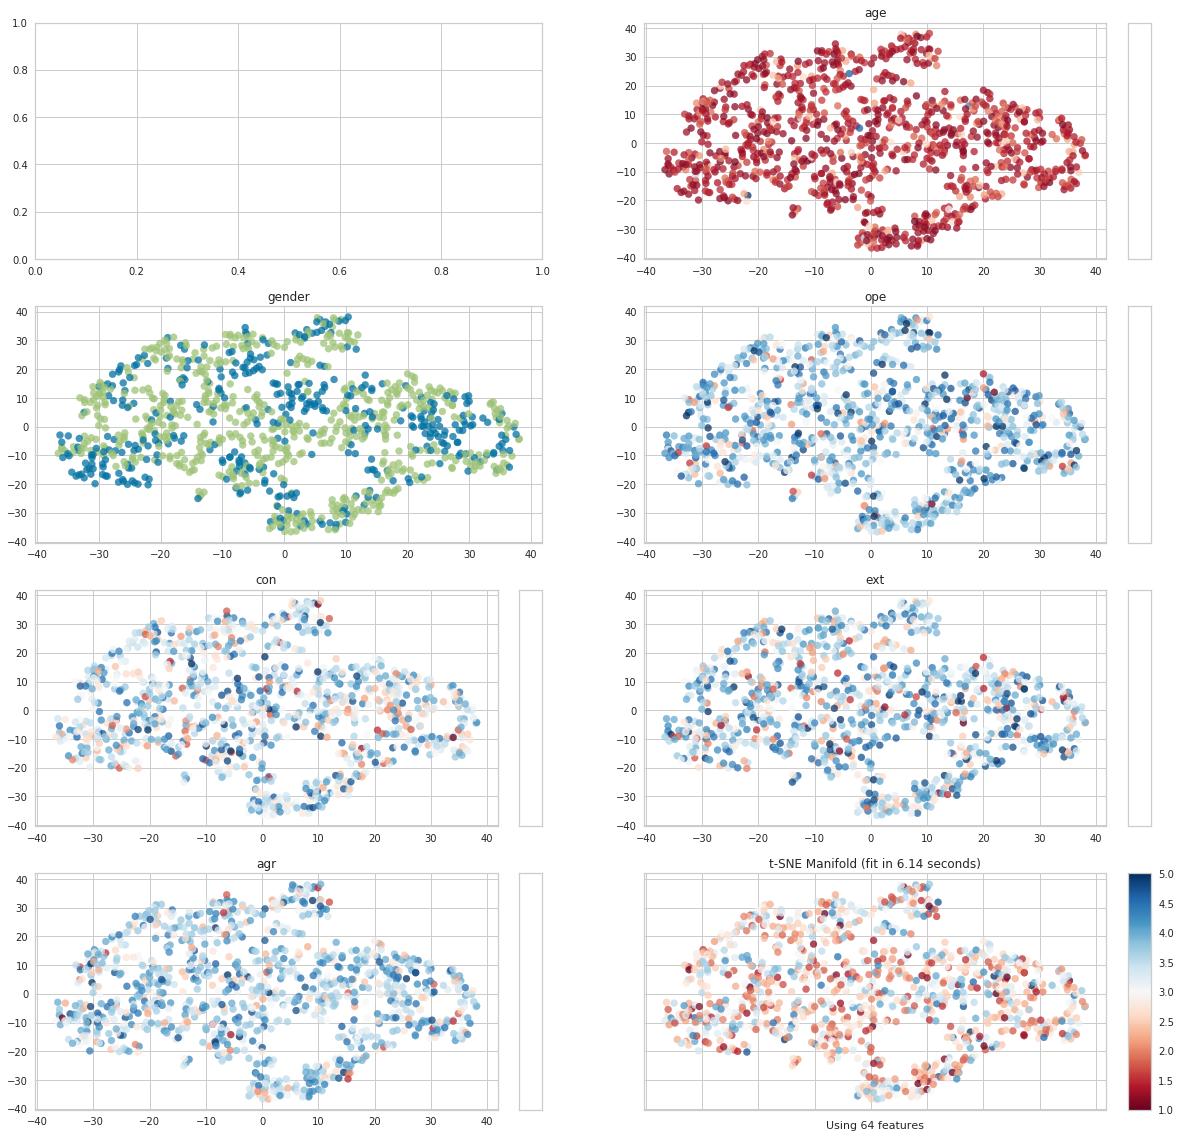

In [24]:
plot_manifolds(X_img, y_img, num_samples=1000, type='tsne', out='Figures/img_tsne.png')

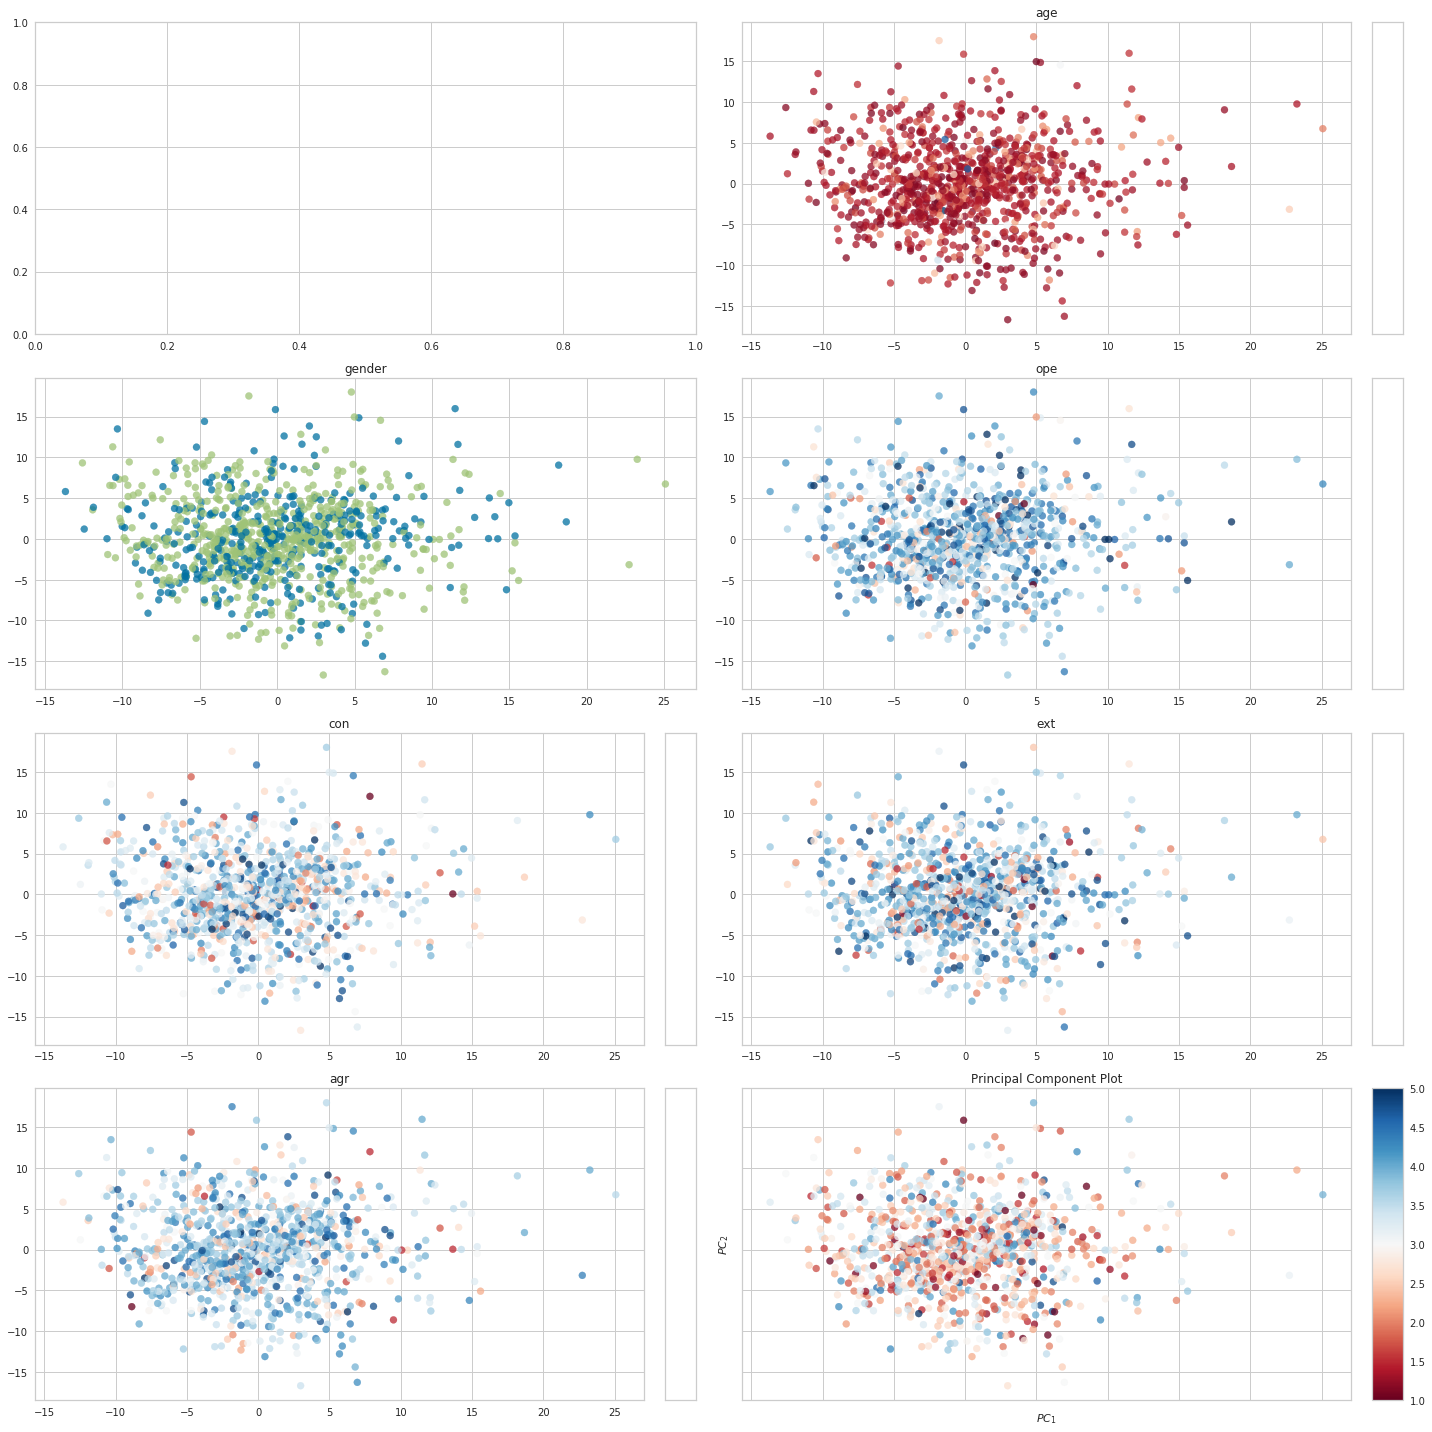

In [25]:
plot_manifolds(X_img, y_img, num_samples=1000, type='pca')

Based on the above visualizations, it would seem the data is hard to separate based on a two-dimensional manifold projection. Nonetheless, the gender manifold shows the clearest class separation, while for the regression task the clustering is less clear. Furthermore, the non-linear t-sne embedding seems to do a much better job of separating the datapoints. We would thus expect non-linear classifiers to eventually perform best based on this visualization.

## Text Data

In [26]:
text_data = pd.merge(left=text_data_liwc, right=text_data_nrc, on='userid')
text_features = text_data.columns.drop(['userid'])
combined_text = pd.merge(left=text_data, right=profiles, on='userid').drop(columns=['unnamed: 0'])
combined_text

,userid,wc,wps,sixltr,dic,numerals,funct,pronoun,ppron,i,...,sadness,surprise,trust,age,gender,ope,con,ext,agr,neu
0,1c1bb692d7765344d418c0247962e7f8,156.0,17.33,25.00,76.92,1.92,45.51,9.62,6.41,3.21,...,0.150000,0.000000,0.200000,49.0,1.0,3.25,3.00,3.25,4.00,2.25
1,2eba17f4ec950f23af8d31a1d1db4518,176.0,11.00,21.02,84.66,0.00,53.41,15.34,12.50,7.39,...,0.064516,0.096774,0.258065,40.0,1.0,4.15,3.70,4.05,3.45,3.30
2,4f3fc35de4f026bbe96d6aead80a011c,179.0,17.90,17.88,90.50,0.00,54.19,11.73,7.82,6.15,...,0.172414,0.068966,0.172414,24.0,0.0,3.25,2.50,3.25,4.00,2.25
3,5b670721d060e5063273aefefd0e0731,179.0,179.00,20.67,77.09,0.00,51.40,12.29,9.50,4.47,...,0.280702,0.070175,0.035088,24.0,0.0,4.65,2.80,3.40,3.35,3.55
4,5ca01e48cdf661e932cfe58588360a7f,18.0,18.00,44.44,55.56,0.00,27.78,0.00,0.00,0.00,...,0.000000,0.000000,0.222222,30.0,0.0,3.50,4.25,4.00,4.00,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,c4ec9bfcb1677ff48661a5ab46baeff1,70.0,70.00,20.00,81.43,1.43,38.57,8.57,7.14,2.86,...,0.043478,0.173913,0.173913,37.0,0.0,3.00,3.25,3.00,3.50,3.25
9496,c031745b4720f02830bc07dcb825f2a8,161.0,53.67,22.98,86.96,0.62,51.55,9.32,6.21,1.24,...,0.142857,0.081633,0.142857,24.0,1.0,3.25,5.00,4.25,3.75,1.50
9497,d8491d0a0a40eb6a62310b4c6dbcee7e,178.0,59.33,19.66,85.39,2.25,54.49,17.42,9.55,7.30,...,0.160000,0.020000,0.140000,16.0,1.0,4.10,3.11,2.15,4.45,3.05
9498,edafd5647870b1f11b63835f325e8b83,134.0,16.75,33.58,69.40,2.24,27.61,1.49,1.49,0.75,...,0.139535,0.046512,0.139535,16.0,1.0,2.50,3.00,3.75,3.00,2.50


In [27]:
X_text = StandardScaler().fit_transform(np.array(combined_text[text_features]))
y_text = np.array(combined_text[y_columns])

# Save to disk
joblib.dump(X_text, "../processed_data/Xtrain_text.pkl")
joblib.dump(y_text, "../processed_data/ytrain_text.pkl")

['../processed_data/ytrain_text.pkl']

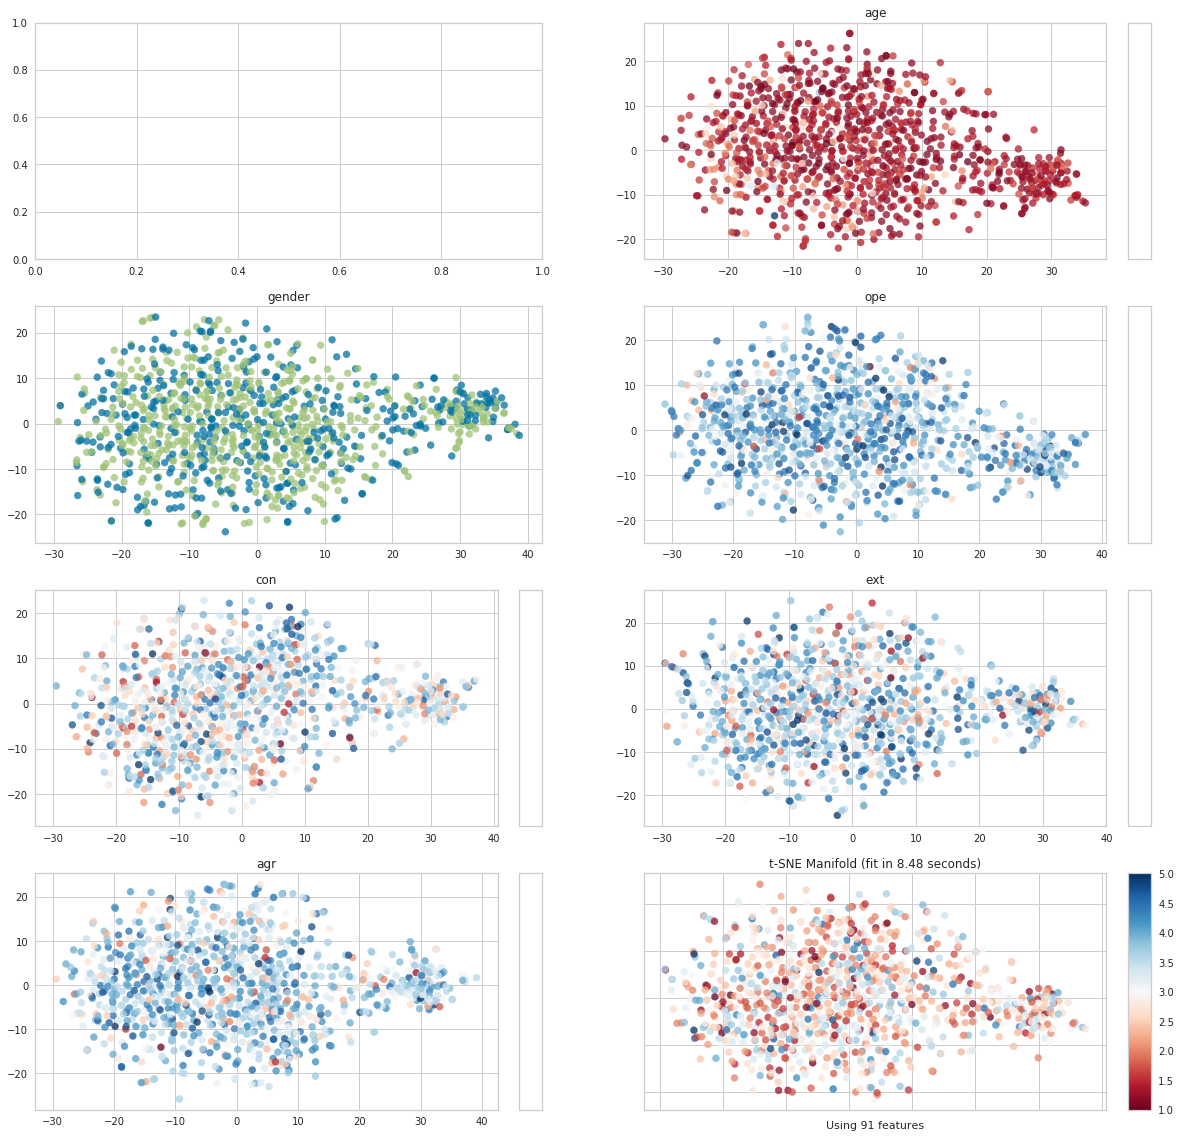

In [28]:
plot_manifolds(X_text, y_text, num_samples=1000, type='tsne', out='Figures/text_tsne.png')

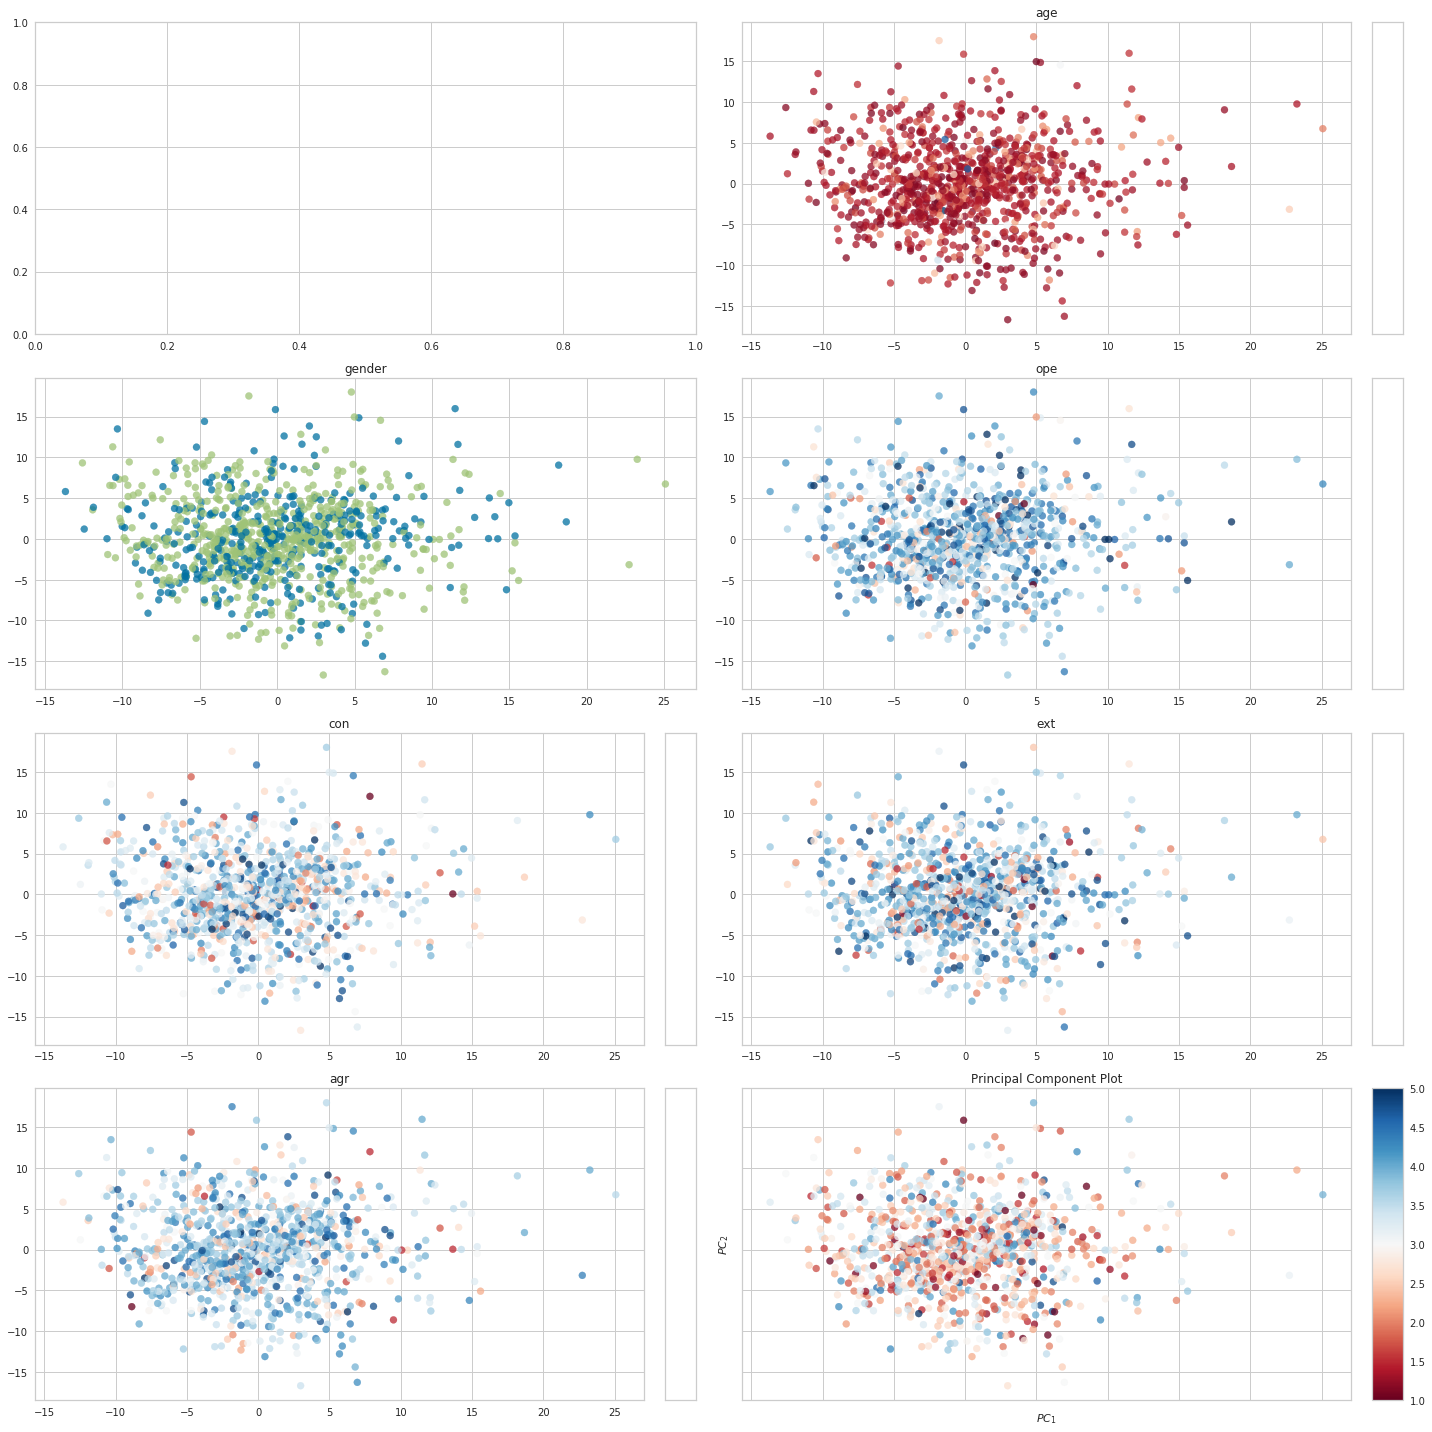

In [29]:
plot_manifolds(X_img, y_img, num_samples=1000, type='pca')

For the text data, we don't seem to get any clear separation in the data from either t-sne or pca, suggesting alternative that a higher dimensional manifold must be required to adequately capture the target clusterings in the data.

## Relational Data

In [30]:
relational_data = relational_data.dropna().drop(['Unnamed: 0'], axis=1)

In [31]:
relational_data['value'] = 1 #Create a dummy column

In [32]:
relational_data = relational_data.pivot(index='userid', columns='like_id')

In [33]:
relational_data = relational_data.fillna(value=0)

In [34]:
relational_data.columns = relational_data.columns.get_level_values('like_id')
relational_data.head()

like_id,2215974432,2219089314,2219808235,2231777543,2232594215,2238752371,2252801962,2254487659,2258014869,2263644905,...,10150238150555001,10150253757470001,10150253874520001,10150257361540001,10150276378375001,10150302162405001,10150312484370001,10150315582995001,10150319896685001,10150320524520001
userid,,,,,,,,,,,,,,,,,,,,,
0000e06e07496624211632e8e264126c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000235a2ba2f48231b7d24e1f08d7878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000c4b6e2468f7d528876fd1a6dffd4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001187432d2a247562082cd0000dec40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001494c3b74f124a2e3435fff17f376b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
combined_rel = pd.merge(left=relational_data, right=profiles, on='userid').drop(columns=['unnamed: 0'])
combined_rel

,userid,2215974432,2219089314,2219808235,2231777543,2232594215,2238752371,2252801962,2254487659,2258014869,...,10150315582995001,10150319896685001,10150320524520001,age,gender,ope,con,ext,agr,neu
0,0000e06e07496624211632e8e264126c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,1.0,4.00,4.75,4.50,2.50,3.75
1,000235a2ba2f48231b7d24e1f08d7878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26.0,0.0,3.80,3.30,3.80,3.70,1.80
2,000c4b6e2468f7d528876fd1a6dffd4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27.0,0.0,4.10,2.85,2.15,3.20,3.65
3,001187432d2a247562082cd0000dec40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,29.0,0.0,3.50,3.75,4.00,4.38,1.88
4,001494c3b74f124a2e3435fff17f376b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,1.0,4.50,4.25,4.00,4.50,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,ffb0a8b51dd1d644bcf3d85f42dcd7d7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.0,0.0,3.65,3.26,3.65,3.65,2.95
9496,ffb2830257138d30925a345f7c404d16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,0.0,3.20,3.80,3.65,4.15,2.40
9497,ffd1a5148d201815453c698214c627c0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,3.75,3.00,3.50,2.50,2.00
9498,ffef7e6438bb62236d1ab8e578744951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.0,0.0,4.75,2.00,3.00,4.00,3.00


In [43]:
rel_features = relational_data.columns
X_rel = np.array(combined_rel[rel_features])
y_rel = np.array(combined_rel[y_columns])

In [44]:
# This data is way too sparse to do anything effective, we need dimensionality reduction for our base features
X_rel = csr_matrix(X_rel)
svd = TruncatedSVD(n_components = 1000)
X_rel = svd.fit_transform(X_rel)

Text(0.5, 1.0, 'Cumulative variance explained as a function of components')

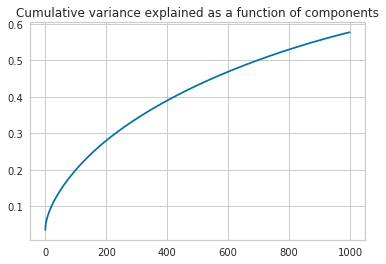

In [45]:
plt.plot(range(1000),svd.explained_variance_ratio_.cumsum())
plt.title('Cumulative variance explained as a function of components')

In [46]:
# Save to disk
joblib.dump(X_rel, "../processed_data/Xtrain_rel.pkl")
joblib.dump(y_rel, "../processed_data/ytrain_rel.pkl")

['../processed_data/ytrain_rel.pkl']

We are explaining approximately 60% of the variance from these features, which is a more than 500x reduction in the feature set size..diminishing returns and the number of components already included lead us to stick with these 1000 new features for the relational data.

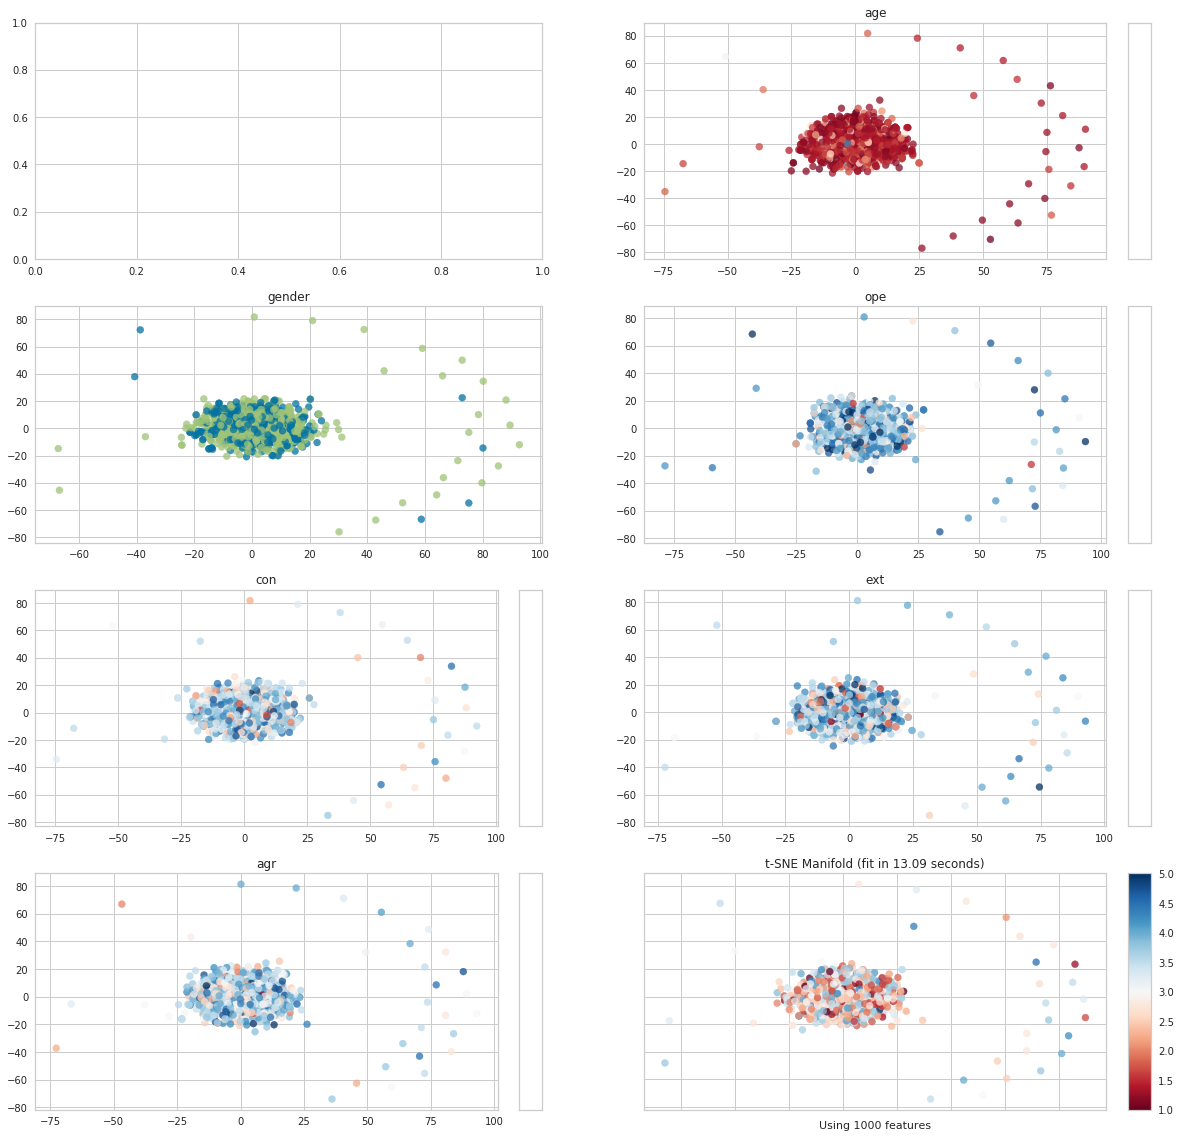

In [47]:
plot_manifolds(X_rel, y_rel, num_samples=1000, type='tsne', out='Figures/rel_tsne.png')

## Combined Feature Space

In [49]:
X_img.shape, X_text.shape, X_rel.shape

((7915, 64), (9500, 91), (9500, 1000))

The image data doesn't have the same size as the other sources, given that some users are missing or even have multiple associated images. As a starting point, we can simply join the associated tables together. We could in the future explore dropping users with multiple images associated, or even imputing features from the missing users in the image data.

In [63]:
def retrieve_id_index(user_ids, dataframe):
    pass

In [93]:
ids = set(image_data.userid).intersection(text_data.userid).intersection(combined_rel.userid)
text_data[text_data.userid.isin(ids)].index
#image_data[image_data.userid.isin(ids)]

Int64Index([   1,    2,    3,    4,    5,    6,    9,   10,   11,   13,
            ...
            9487, 9489, 9490, 9491, 9493, 9494, 9496, 9497, 9498, 9499],
           dtype='int64', length=7174)

## Profile Targets

In [ ]:
y_correlations = combined_image[y_columns].corr().abs()
fig=ff.create_annotated_heatmap(
    z=y_correlations.values,
    x=list(y_columns),
    y=list(y_columns),
    annotation_text=y_correlations.round(2).values,
    showscale=True,
    colorscale='Blues')
fig

We find the targets to be very weekly correlated in general, with only the "con", "ext", and"agr" targets presenting slightly more robust correlation with the "neu" target. Thus it might be worth exploring using some form of multi-task predictor for these attributes and "neu". However we expect that in general independent estimators might perform better on this suite of tasks.

### Target distributions

We now look at the distributional information for the different targets, to get a sense of the imbalance and skewness in the data we are trying to predict.

In [ ]:
personalities = y_columns.drop(['age', 'gender'])

fig = ff.create_distplot([combined_image[y_columns][p] for p in personalities], group_labels=personalities,bin_size=0.2)
fig.show()

Most of the behavioural targets appear to be somewhat normally distributed with a slight skew towards higher values. This is a relatively clean target distribution and shouldn't pose any major problems.

In [ ]:
fig = ff.create_distplot([combined_image[y_columns]['age']], group_labels=['age'])
fig.show()

The age targets again present are normal-like distribution, but with much more skewness and a long tail. This implies a regression model might have a hard time predicting samples in the tail accurately. Beyond giving more weight to samples in the tail, something like conversion to a log scale might make learning over the targets somewhat more manageable. We can see what the targets look like under this transformation:

In [ ]:
fig = ff.create_distplot([np.log(combined_image[y_columns]['age'])], group_labels=['age'], bin_size=0.05)
fig.show()

As expected, it appears the converting to a log scale over the age target seems to significantly reduce the tail effect, and could potentially help our model.

In [ ]:
balance = ClassBalance(labels=['male', 'female'])
balance.fit(y_img[:,1])
balance.show()

The classes for the gender task are somewhat unbalanced. This suggests that some sort of re-weigthing or upsampling might help our model avoir bias towards predicting the female class.